# Pricnciple Component Analysis
### The note book implements the PCA on synthetic dataset
#### 8 August 2021
#### Ibrahim Radwan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

In [2]:
# Create a synthetic dataset
means = [2.13, -99, 0.11, -1.01] # 4 columns with different means
# Covariance matrix - generalization of the concept of variance to the multivariate case 
cov_matrix = np.array([[1, 0.96, 0, 0], [0.96, 1, 0, 0], [0, 0, 1, 0.87], [0, 0, 0.87, 1]]) 
print('Covariance matrix')
print(cov_matrix)

n = 100 # number of rows
dataset = np.random.multivariate_normal(means, cov_matrix, n)
print("\nDataset:\n", dataset)
print("\nDataset shape:\n", dataset.shape)

Covariance matrix
[[1.   0.96 0.   0.  ]
 [0.96 1.   0.   0.  ]
 [0.   0.   1.   0.87]
 [0.   0.   0.87 1.  ]]

Dataset:
 [[ 3.34870152e+00 -9.78304207e+01 -2.32395671e-01 -9.40311674e-01]
 [ 3.01471187e+00 -9.80546410e+01  4.87054827e-01 -2.50851162e-01]
 [ 2.43633969e+00 -9.85206414e+01  1.99509851e+00  1.03889235e+00]
 [ 2.30444913e+00 -9.91752581e+01 -1.08285992e+00 -2.46929955e+00]
 [ 7.20855629e-01 -1.00299365e+02 -7.75812602e-02 -9.12513111e-01]
 [ 2.83691387e+00 -9.87393999e+01 -5.52517419e-01 -1.51539569e+00]
 [ 2.22310253e+00 -9.90164558e+01  2.03877256e+00  7.93673800e-01]
 [ 1.28066937e+00 -9.98007869e+01 -1.24191770e+00 -1.84989557e+00]
 [ 1.83748585e+00 -9.96139296e+01 -1.12873991e-01 -1.56158937e+00]
 [ 1.83695211e+00 -9.93625203e+01  9.01776866e-01  4.39002974e-02]
 [ 2.14824459e+00 -9.83262346e+01  1.02666351e+00  4.18181731e-01]
 [ 3.75124787e+00 -9.71043249e+01 -2.22994038e-01 -7.92507732e-01]
 [ 2.65175524e+00 -9.85084885e+01 -5.18595329e-01 -1.50288061e+00]
 [ 2.98

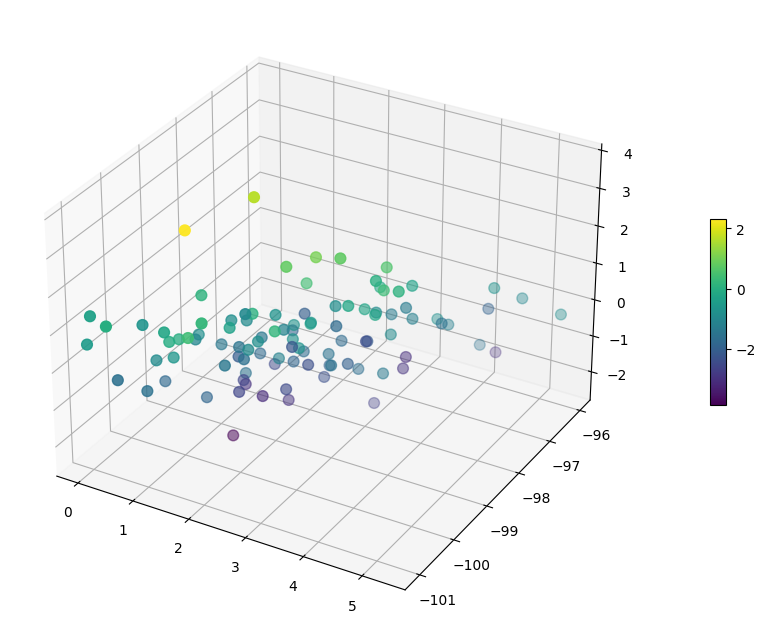

In [3]:
# Let us plot the data
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=dataset[:,0], ys=dataset[:,1], zs=dataset[:,2], c=dataset[:,3], s=60)

cax = fig.add_axes([ax.get_position().x1+0.10, ax.get_position().y0+0.14, 0.02,
                    ax.get_position().height*0.3])
fig.colorbar(img, cax=cax)

plt.show()

### 1. Data standardization

In [4]:
print('Before standardization')
print('Mean:\n',dataset.mean(axis=0))
print('Standard deviation:\n',dataset.std(axis=0))

# Standardization
dataset_standardizated = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0)

print('\nAfter standardization')
print('Mean:\n',dataset_standardizated.mean(axis=0))
print('Standard deviation:\n',dataset_standardizated.std(axis=0))

Before standardization
Mean:
 [  2.31729525 -98.82058919   0.1023892   -1.11414663]
Standard deviation:
 [1.07913038 1.07602786 0.99497658 1.09398531]

After standardization
Mean:
 [-9.18154441e-16 -2.37698750e-14 -8.88178420e-18  2.69784195e-16]
Standard deviation:
 [1. 1. 1. 1.]


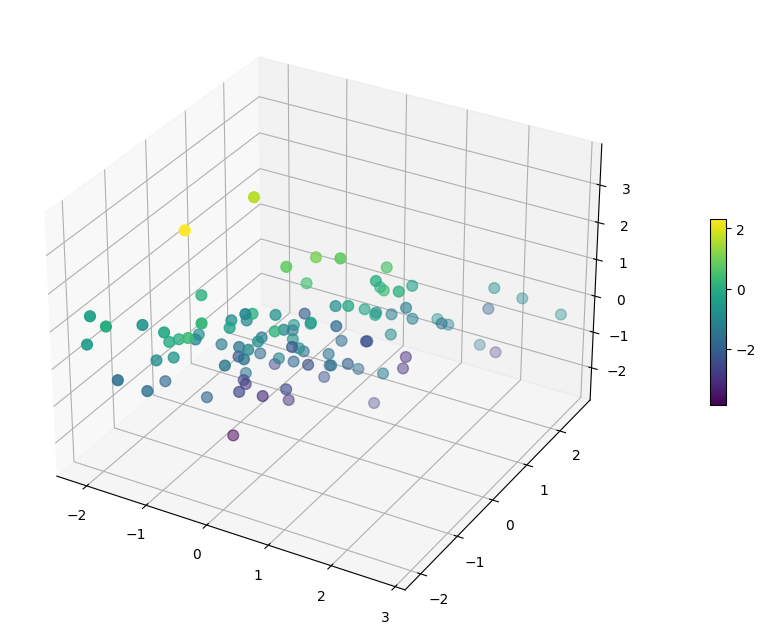

In [5]:
# Let us plot the standardised data
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=dataset_standardizated[:,0], ys=dataset_standardizated[:,1], zs=dataset_standardizated[:,2], c=dataset[:,3], s=60)

cax = fig.add_axes([ax.get_position().x1+0.10, ax.get_position().y0+0.14, 0.02,
                    ax.get_position().height*0.3])
fig.colorbar(img, cax=cax)

plt.show()

### 2. Creating a covariance matrix.

In [6]:
covariance_matrix = np.cov(dataset_standardizated.T)
covariance_matrix

array([[ 1.01010101,  0.97714859, -0.14350151, -0.15128994],
       [ 0.97714859,  1.01010101, -0.15781726, -0.14307687],
       [-0.14350151, -0.15781726,  1.01010101,  0.89588637],
       [-0.15128994, -0.14307687,  0.89588637,  1.01010101]])

### 3. Eigen Decomposition.

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print('eigenvalues:\n',eigenvalues,'\n\neigenvectors:\n',eigenvectors)

eigenvalues:
 [2.24722497 1.64602371 0.03141453 0.11574084] 

eigenvectors:
 [[-0.5320756  -0.46598074  0.70029805 -0.09664444]
 [-0.53336598 -0.46397995 -0.70100128  0.09402412]
 [ 0.46585259 -0.53167277 -0.09652991 -0.70070493]
 [ 0.46410952 -0.53376833  0.0941372   0.70059397]]


### 4. Explained total variance.

[0.556, 0.407, 0.029, 0.008]


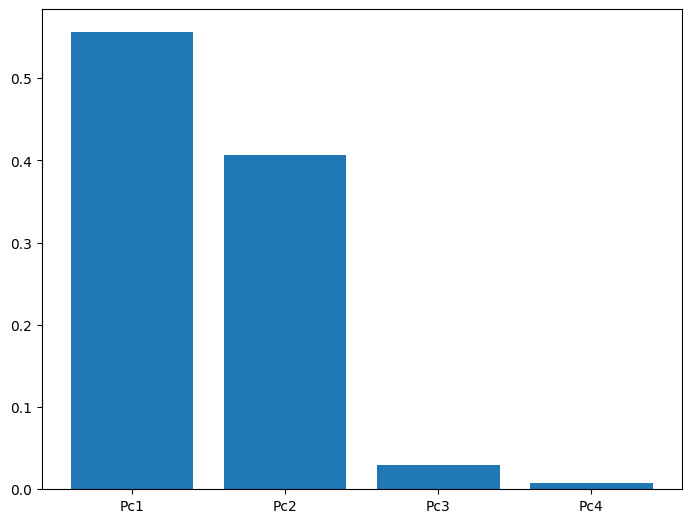

In [8]:
explained_variance = [round((i/np.sum(eigenvalues)), 3) for i in sorted(eigenvalues, reverse=True)]
print(explained_variance)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis_labels = ['Pc1', 'Pc2', 'Pc3', 'Pc4']
ax.bar(x_axis_labels,explained_variance)
plt.show()

### 5. Feature transformation.

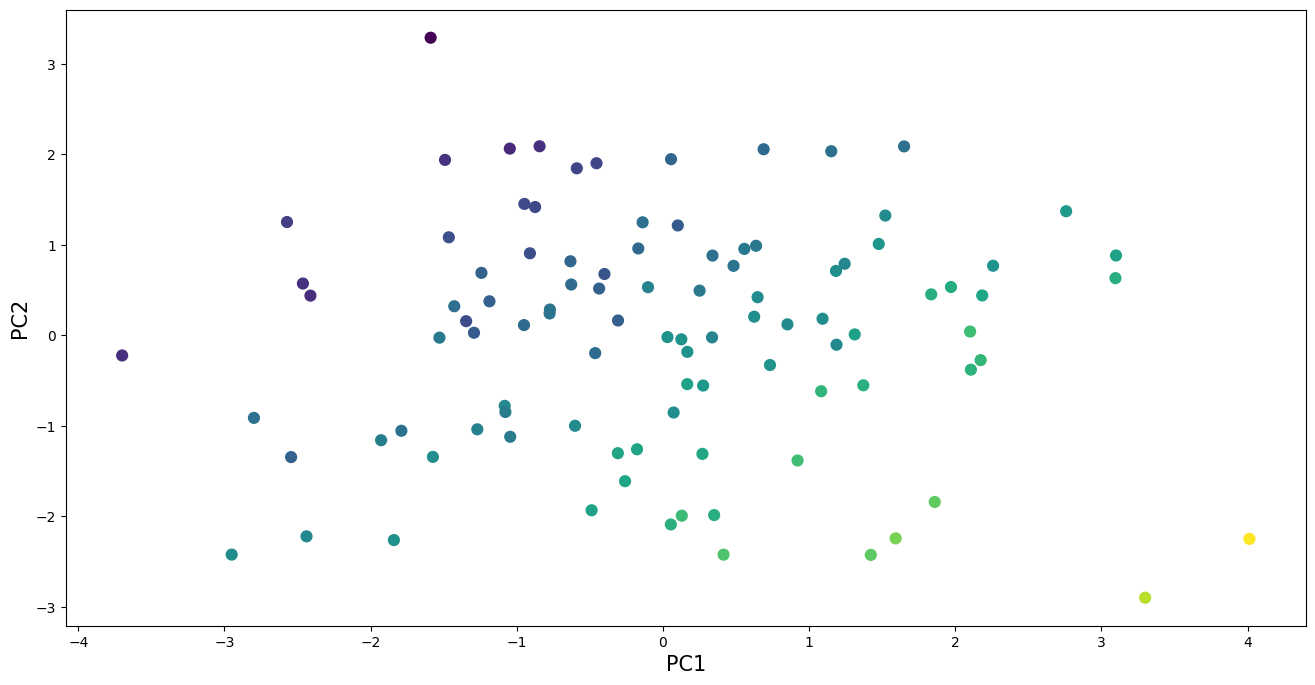

In [9]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenpairs.sort(key = lambda k: k[0], reverse=True)

w = np.hstack((eigenpairs[0][1][:, np.newaxis],
               eigenpairs[1][1][:, np.newaxis]))
pc1 = dataset_standardizated.dot(w.T[0])
pc2 = dataset_standardizated.dot(w.T[1])

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.scatter(x=pc1, y=pc2, c=dataset[:,3], s=60)
ax.set_xlabel(xlabel='PC1', rotation=0, size=15)
ax.set_ylabel(ylabel='PC2', rotation=90,size=15)
plt.show()